In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings( "ignore")

# WINE-QUALITY PREDICTION 

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# CATEGORIZING ALL THE NUMERICS INTO CATEGORY

In [5]:
# categorizing " fixed acidity"

In [6]:
# Define the bin edges and labels for fixed acidity
bin_edges = [0, 7, 8, 9, 10, 16]
bin_labels = ['0-4', '4-7','7-9','9-12','12-16']  # Adjusted bin_labels

# Create a new column 'fixed_acidity_category' based on the binning
df['fixed_acidity_category'] = pd.cut(df['fixed acidity'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the modified DataFrame
print(df[['fixed acidity', 'fixed_acidity_category']])



      fixed acidity fixed_acidity_category
0               7.4                    4-7
1               7.8                    4-7
2               7.8                    4-7
3              11.2                  12-16
4               7.4                    4-7
...             ...                    ...
1594            6.2                    0-4
1595            5.9                    0-4
1596            6.3                    0-4
1597            5.9                    0-4
1598            6.0                    0-4

[1599 rows x 2 columns]


In [7]:
df['volatile acidity'].max()

1.58

In [8]:
# Define the bin edges and labels for volatile acidity
bin_edges_va = [0, 0.5, 1, 1.5]
bin_labels_va = ['0-0.5', '0.5-1', '1-1.5']

# Create a new column 'volatile_acidity_category' based on the binning
df['volatile_acidity_category'] = pd.cut(df['volatile acidity'], bins=bin_edges_va, labels=bin_labels_va, include_lowest=True)

# Display the modified DataFrame
print(df[['volatile acidity', 'volatile_acidity_category']])


      volatile acidity volatile_acidity_category
0                0.700                     0.5-1
1                0.880                     0.5-1
2                0.760                     0.5-1
3                0.280                     0-0.5
4                0.700                     0.5-1
...                ...                       ...
1594             0.600                     0.5-1
1595             0.550                     0.5-1
1596             0.510                     0.5-1
1597             0.645                     0.5-1
1598             0.310                     0-0.5

[1599 rows x 2 columns]


In [9]:
df['citric acid'].max()

1.0

In [10]:
# Define the bin edges and labels for citric acid
bin_edges_ca = [0, 0.25, 0.5, 0.75, 1]
bin_labels_ca = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

# Create a new column 'citric_acid_category' based on the binning
df['citric_acid_category'] = pd.cut(df['citric acid'], bins=bin_edges_ca, labels=bin_labels_ca, include_lowest=True)

# Display the modified DataFrame
print(df[['citric acid', 'citric_acid_category']])


      citric acid citric_acid_category
0            0.00               0-0.25
1            0.00               0-0.25
2            0.04               0-0.25
3            0.56             0.5-0.75
4            0.00               0-0.25
...           ...                  ...
1594         0.08               0-0.25
1595         0.10               0-0.25
1596         0.13               0-0.25
1597         0.12               0-0.25
1598         0.47             0.25-0.5

[1599 rows x 2 columns]


In [11]:
# Define the bin edges and labels for residual sugar
bin_edges_rs = [0, 5, 10, 15.5]
bin_labels_rs = ['0-5', '5-10', '10-15.5']

# Create a new column 'residual_sugar_category' based on the binning
df['residual_sugar_category'] = pd.cut(df['residual sugar'], bins=bin_edges_rs, labels=bin_labels_rs, include_lowest=True)

# Display the modified DataFrame
print(df[['residual sugar', 'residual_sugar_category']])


      residual sugar residual_sugar_category
0                1.9                     0-5
1                2.6                     0-5
2                2.3                     0-5
3                1.9                     0-5
4                1.9                     0-5
...              ...                     ...
1594             2.0                     0-5
1595             2.2                     0-5
1596             2.3                     0-5
1597             2.0                     0-5
1598             3.6                     0-5

[1599 rows x 2 columns]


In [12]:
# Define the bin edges and labels for chlorides
bin_edges_chlorides = [0, 0.08, 0.1, 0.2, 0.611]  # Adjusted to include the maximum value
bin_labels_chlorides = ['0-0.08', '0.08-0.1', '0.1-0.2', '0.2-0.611']

# Create a new column 'chlorides_category' based on the binning
df['chlorides_category'] = pd.cut(df['chlorides'], bins=bin_edges_chlorides, labels=bin_labels_chlorides, include_lowest=True)

# Display the modified DataFrame
print(df[['chlorides', 'chlorides_category']])


      chlorides chlorides_category
0         0.076             0-0.08
1         0.098           0.08-0.1
2         0.092           0.08-0.1
3         0.075             0-0.08
4         0.076             0-0.08
...         ...                ...
1594      0.090           0.08-0.1
1595      0.062             0-0.08
1596      0.076             0-0.08
1597      0.075             0-0.08
1598      0.067             0-0.08

[1599 rows x 2 columns]


In [13]:
# Define the bin edges and labels for free sulfur dioxide
bin_edges_freeso2 = [0, 10, 20, 30, 40, 72]  # Adjusted to include the maximum value
bin_labels_freeso2 = ['0-10', '10-20', '20-30', '30-40', '40-72']

# Create a new column 'free_sulfur_dioxide_category' based on the binning
df['free_sulfur_dioxide_category'] = pd.cut(df['free sulfur dioxide'], bins=bin_edges_freeso2, labels=bin_labels_freeso2, include_lowest=True)

# Display the modified DataFrame
print(df[['free sulfur dioxide', 'free_sulfur_dioxide_category']])


      free sulfur dioxide free_sulfur_dioxide_category
0                    11.0                        10-20
1                    25.0                        20-30
2                    15.0                        10-20
3                    17.0                        10-20
4                    11.0                        10-20
...                   ...                          ...
1594                 32.0                        30-40
1595                 39.0                        30-40
1596                 29.0                        20-30
1597                 32.0                        30-40
1598                 18.0                        10-20

[1599 rows x 2 columns]


In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'fixed_acidity_category',
       'volatile_acidity_category', 'citric_acid_category',
       'residual_sugar_category', 'chlorides_category',
       'free_sulfur_dioxide_category'],
      dtype='object')

In [15]:
# Define the bin edges and labels for total sulfur dioxide
bin_edges_tso2 = [0, 50, 100, 150, 200, 289]  # Adjusted to include the maximum value
bin_labels_tso2 = ['0-50', '50-100', '100-150', '150-200', '200-289']

# Create a new column 'total_sulfur_dioxide_category' based on the binning
df['total_sulfur_dioxide_category'] = pd.cut(df['total sulfur dioxide'], bins=bin_edges_tso2, labels=bin_labels_tso2, include_lowest=True)

# Display the modified DataFrame
print(df[['total sulfur dioxide', 'total_sulfur_dioxide_category']])


      total sulfur dioxide total_sulfur_dioxide_category
0                     34.0                          0-50
1                     67.0                        50-100
2                     54.0                        50-100
3                     60.0                        50-100
4                     34.0                          0-50
...                    ...                           ...
1594                  44.0                          0-50
1595                  51.0                        50-100
1596                  40.0                          0-50
1597                  44.0                          0-50
1598                  42.0                          0-50

[1599 rows x 2 columns]


In [16]:
# Define the bin edges and labels for density
bin_edges_density = [0.990, 0.995, 1.000, 1.005, 1.010, 1.015]  # Adjusted to include the maximum value
bin_labels_density = ['0.990-0.995', '0.995-1.000', '1.000-1.005', '1.005-1.010', '1.010-1.015']

# Create a new column 'density_category' based on the binning
df['density_category'] = pd.cut(df['density'], bins=bin_edges_density, labels=bin_labels_density, include_lowest=True)

# Display the modified DataFrame
print(df[['density', 'density_category']])


      density density_category
0     0.99780      0.995-1.000
1     0.99680      0.995-1.000
2     0.99700      0.995-1.000
3     0.99800      0.995-1.000
4     0.99780      0.995-1.000
...       ...              ...
1594  0.99490      0.990-0.995
1595  0.99512      0.995-1.000
1596  0.99574      0.995-1.000
1597  0.99547      0.995-1.000
1598  0.99549      0.995-1.000

[1599 rows x 2 columns]


In [17]:
# Define the bin edges and labels for pH
bin_edges_pH = [2.5, 3.0, 3.5, 4.0, 4.1]  # Adjusted to include the maximum value
bin_labels_pH = ['2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.1']

# Create a new column 'pH_category' based on the binning
df['pH_category'] = pd.cut(df['pH'], bins=bin_edges_pH, labels=bin_labels_pH, include_lowest=True)

# Display the modified DataFrame
print(df[['pH', 'pH_category']])


        pH pH_category
0     3.51     3.5-4.0
1     3.20     3.0-3.5
2     3.26     3.0-3.5
3     3.16     3.0-3.5
4     3.51     3.5-4.0
...    ...         ...
1594  3.45     3.0-3.5
1595  3.52     3.5-4.0
1596  3.42     3.0-3.5
1597  3.57     3.5-4.0
1598  3.39     3.0-3.5

[1599 rows x 2 columns]


In [18]:
# Define the bin edges and labels for sulphates
bin_edges_sulphates = [0.0, 0.5, 1.0, 1.5, 2.0]  # Adjusted to include the maximum value
bin_labels_sulphates = ['0.0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0']

# Create a new column 'sulphates_category' based on the binning
df['sulphates_category'] = pd.cut(df['sulphates'], bins=bin_edges_sulphates, labels=bin_labels_sulphates, include_lowest=True)

# Display the modified DataFrame
print(df[['sulphates', 'sulphates_category']])


      sulphates sulphates_category
0          0.56            0.5-1.0
1          0.68            0.5-1.0
2          0.65            0.5-1.0
3          0.58            0.5-1.0
4          0.56            0.5-1.0
...         ...                ...
1594       0.58            0.5-1.0
1595       0.76            0.5-1.0
1596       0.75            0.5-1.0
1597       0.71            0.5-1.0
1598       0.66            0.5-1.0

[1599 rows x 2 columns]


In [19]:
# Define the bin edges and labels for alcohol
bin_edges_alcohol = [8.0, 10.0, 12.0, 14.0, 15.0]  # Adjusted to include the maximum value
bin_labels_alcohol = ['8.0-10.0', '10.0-12.0', '12.0-14.0', '14.0-15.0']

# Create a new column 'alcohol_category' based on the binning
df['alcohol_category'] = pd.cut(df['alcohol'], bins=bin_edges_alcohol, labels=bin_labels_alcohol, include_lowest=True)

# Display the modified DataFrame
print(df[['alcohol', 'alcohol_category']])


      alcohol alcohol_category
0         9.4         8.0-10.0
1         9.8         8.0-10.0
2         9.8         8.0-10.0
3         9.8         8.0-10.0
4         9.4         8.0-10.0
...       ...              ...
1594     10.5        10.0-12.0
1595     11.2        10.0-12.0
1596     11.0        10.0-12.0
1597     10.2        10.0-12.0
1598     11.0        10.0-12.0

[1599 rows x 2 columns]


In [20]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
# Define the conditions for categorizing quality
conditions = [
    (df['quality'] == 3) | (df['quality'] == 4) | (df['quality'] == 5),
    (df['quality'] == 6) | (df['quality'] == 7) | (df['quality'] == 8),
]

# Define the corresponding labels
labels = ['Low Quality', 'High Quality']

# Create a new column 'quality_category' based on the conditions and labels
df['quality_category'] = np.select(conditions, labels, default='Unknown')

# Display the modified DataFrame
print(df[['quality', 'quality_category']])


      quality quality_category
0           5      Low Quality
1           5      Low Quality
2           5      Low Quality
3           6     High Quality
4           5      Low Quality
...       ...              ...
1594        5      Low Quality
1595        6     High Quality
1596        6     High Quality
1597        5      Low Quality
1598        6     High Quality

[1599 rows x 2 columns]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   fixed acidity                  1599 non-null   float64 
 1   volatile acidity               1599 non-null   float64 
 2   citric acid                    1599 non-null   float64 
 3   residual sugar                 1599 non-null   float64 
 4   chlorides                      1599 non-null   float64 
 5   free sulfur dioxide            1599 non-null   float64 
 6   total sulfur dioxide           1599 non-null   float64 
 7   density                        1599 non-null   float64 
 8   pH                             1599 non-null   float64 
 9   sulphates                      1599 non-null   float64 
 10  alcohol                        1599 non-null   float64 
 11  quality                        1599 non-null   int64   
 12  fixed_acidity_category         159

In [23]:
df.duplicated().sum()

240

In [24]:
df = df.drop_duplicates()


In [25]:
df.shape

(1359, 24)

### Build a decision tree classification model to predict the quality category of wines based on various physicochemical attributes. The quality categories are defined as "Low Quality" and "High Quality."

# creating a new data frame which has all the categories

In [26]:
# Extract columns with category and object data types
new_df= df.select_dtypes(include=['category', 'object']).copy()


In [27]:
new_df.head()

,fixed_acidity_category,volatile_acidity_category,citric_acid_category,residual_sugar_category,chlorides_category,free_sulfur_dioxide_category,total_sulfur_dioxide_category,density_category,pH_category,sulphates_category,alcohol_category,quality_category
0,4-7,0.5-1,0-0.25,0-5,0-0.08,10-20,0-50,0.995-1.000,3.5-4.0,0.5-1.0,8.0-10.0,Low Quality
1,4-7,0.5-1,0-0.25,0-5,0.08-0.1,20-30,50-100,0.995-1.000,3.0-3.5,0.5-1.0,8.0-10.0,Low Quality
2,4-7,0.5-1,0-0.25,0-5,0.08-0.1,10-20,50-100,0.995-1.000,3.0-3.5,0.5-1.0,8.0-10.0,Low Quality
3,12-16,0-0.5,0.5-0.75,0-5,0-0.08,10-20,50-100,0.995-1.000,3.0-3.5,0.5-1.0,8.0-10.0,High Quality
5,4-7,0.5-1,0-0.25,0-5,0-0.08,10-20,0-50,0.995-1.000,3.5-4.0,0.5-1.0,8.0-10.0,Low Quality


In [28]:
new_df.shape

(1359, 12)

In [29]:
new_df.columns

Index(['fixed_acidity_category', 'volatile_acidity_category',
       'citric_acid_category', 'residual_sugar_category', 'chlorides_category',
       'free_sulfur_dioxide_category', 'total_sulfur_dioxide_category',
       'density_category', 'pH_category', 'sulphates_category',
       'alcohol_category', 'quality_category'],
      dtype='object')

In [30]:
# Display unique values for selected columns
selected_columns = ['fixed_acidity_category', 'volatile_acidity_category',
                     'citric_acid_category', 'residual_sugar_category',
                     'chlorides_category', 'free_sulfur_dioxide_category',
                     'total_sulfur_dioxide_category', 'density_category',
                     'pH_category', 'sulphates_category', 'alcohol_category',
                     'quality_category']

for column in selected_columns:
    print(f'{column} \n', df[column].value_counts(), '\n')


fixed_acidity_category 
 4-7      415
0-4      315
7-9      252
12-16    214
9-12     163
Name: fixed_acidity_category, dtype: int64 

volatile_acidity_category 
 0.5-1    686
0-0.5    652
1-1.5     20
Name: volatile_acidity_category, dtype: int64 

citric_acid_category 
 0-0.25      671
0.25-0.5    525
0.5-0.75    157
0.75-1        6
Name: citric_acid_category, dtype: int64 

residual_sugar_category 
 0-5        1293
5-10         58
10-15.5       8
Name: residual_sugar_category, dtype: int64 

chlorides_category 
 0-0.08       741
0.08-0.1     423
0.1-0.2      158
0.2-0.611     37
Name: chlorides_category, dtype: int64 

free_sulfur_dioxide_category 
 0-10     514
10-20    470
20-30    236
30-40    104
40-72     35
Name: free_sulfur_dioxide_category, dtype: int64 

total_sulfur_dioxide_category 
 0-50       887
50-100     359
100-150    104
150-200      7
200-289      2
Name: total_sulfur_dioxide_category, dtype: int64 

density_category 
 0.995-1.000    1085
0.990-0.995     218
1.000

# ENCODING THE LABELS IN EACH FEATURE

In [31]:
for feature in new_df.columns: 
    if new_df[feature].dtype == 'object' or new_df[feature].dtype.name == 'category': 
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(new_df[feature].unique()))
        print(pd.Categorical(new_df[feature].unique()).codes)
        new_df[feature] = pd.Categorical(new_df[feature]).codes




feature: fixed_acidity_category
['4-7', '12-16', '0-4', '7-9', '9-12']
Categories (5, object): ['0-4' < '4-7' < '7-9' < '9-12' < '12-16']
[1 4 0 2 3]


feature: volatile_acidity_category
['0.5-1', '0-0.5', '1-1.5', NaN]
Categories (3, object): ['0-0.5' < '0.5-1' < '1-1.5']
[ 1  0  2 -1]


feature: citric_acid_category
['0-0.25', '0.5-0.75', '0.25-0.5', '0.75-1']
Categories (4, object): ['0-0.25' < '0.25-0.5' < '0.5-0.75' < '0.75-1']
[0 2 1 3]


feature: residual_sugar_category
['0-5', '5-10', '10-15.5']
Categories (3, object): ['0-5' < '5-10' < '10-15.5']
[0 1 2]


feature: chlorides_category
['0-0.08', '0.08-0.1', '0.1-0.2', '0.2-0.611']
Categories (4, object): ['0-0.08' < '0.08-0.1' < '0.1-0.2' < '0.2-0.611']
[0 1 2 3]


feature: free_sulfur_dioxide_category
['10-20', '20-30', '0-10', '40-72', '30-40']
Categories (5, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-72']
[1 2 0 4 3]


feature: total_sulfur_dioxide_category
['0-50', '50-100', '100-150', '150-200', '200-289']
Cate

In [32]:
new_df.head()

,fixed_acidity_category,volatile_acidity_category,citric_acid_category,residual_sugar_category,chlorides_category,free_sulfur_dioxide_category,total_sulfur_dioxide_category,density_category,pH_category,sulphates_category,alcohol_category,quality_category
0,1,1,0,0,0,1,0,1,2,1,0,1
1,1,1,0,0,1,2,1,1,1,1,0,1
2,1,1,0,0,1,1,1,1,1,1,0,1
3,4,0,2,0,0,1,1,1,1,1,0,0
5,1,1,0,0,0,1,0,1,2,1,0,1


In [33]:
new_df['quality_category'].value_counts()

0    719
1    640
Name: quality_category, dtype: int64

# spliting data into X and y

In [34]:
X = new_df.drop('quality_category', axis=1)
y = new_df['quality_category']

In [35]:
X.head(1)

,fixed_acidity_category,volatile_acidity_category,citric_acid_category,residual_sugar_category,chlorides_category,free_sulfur_dioxide_category,total_sulfur_dioxide_category,density_category,pH_category,sulphates_category,alcohol_category
0,1,1,0,0,0,1,0,1,2,1,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [38]:
#stratify=y

In [39]:
X_train.head(2)

,fixed_acidity_category,volatile_acidity_category,citric_acid_category,residual_sugar_category,chlorides_category,free_sulfur_dioxide_category,total_sulfur_dioxide_category,density_category,pH_category,sulphates_category,alcohol_category
1332,2,0,0,0,0,0,0,1,1,0,0
419,0,1,0,0,0,3,1,1,2,1,0


In [40]:
y_train.value_counts()

0    503
1    448
Name: quality_category, dtype: int64

## HERE WE OBSERVE THAT THERE IS A CLASS IMBANCE PROBLEM

In [41]:
# Step 2: Build and Train the Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [42]:
y_train.value_counts(normalize=True)

0    0.528917
1    0.471083
Name: quality_category, dtype: float64

### Step 2: Build and Train the Decision Tree Model with Class Weights

In [43]:
# Step 2: Build and Train the Decision Tree Model with Class Weights
class_weights = {0: 1, 1: 5, 2: 1}  # Adjust the weights based on the class distribution
tree_model_weighted = DecisionTreeClassifier(random_state=1, class_weight=class_weights)
tree_model_weighted.fit(X_train, y_train)

# Continue with the evaluation steps...


DecisionTreeClassifier(class_weight={0: 1, 1: 5, 2: 1}, random_state=1)

In [44]:
y_train.value_counts(normalize=True)

0    0.528917
1    0.471083
Name: quality_category, dtype: float64

In [45]:
from sklearn.metrics import classification_report, accuracy_score
# Step 3: Make Predictions
ytest_pred = tree_model.predict(X_test)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y_test, ytest_pred)
classification_report_result = classification_report(y_test, ytest_pred)

## ACCURACY ON TEST DATA IS 68%

In [46]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       216
           1       0.67      0.61      0.64       192

    accuracy                           0.68       408
   macro avg       0.68      0.67      0.67       408
weighted avg       0.68      0.68      0.67       408



In [47]:
# Step 3: Make Predictions
ytrain_pred = tree_model.predict(X_train)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y_train, ytrain_pred)
classification_report_result = classification_report(y_train, ytrain_pred)

## ACCURACY ON TRAIN DATA IS 89%

In [48]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       503
           1       0.95      0.82      0.88       448

    accuracy                           0.89       951
   macro avg       0.90      0.89      0.89       951
weighted avg       0.90      0.89      0.89       951



## THIS TELLS THAT THE MODEL IS OVERFITTED

#  -------------------------------------------------------------------------------------------------

# WE USED CCP_ALPHA AND TRIED TO SOLVE THE PROBLEM OF OVERFITTING BY INCREASING THE ACCURACY ON BOTH TRAIN AND TEST


In [49]:
path = clf.cost_complexity_pruning_path(X_train, y_train) # simple tree
ccp_alphas, impurities = path.ccp_alphas, path.impurities

NameError: name 'clf' is not defined

In [50]:
clfs=[] #simple tree
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Number of nodes in last tree is: {} with ccp_alpha: {}".format( clfs[-1].tree_.node_count, ccp_alphas[-1]))

NameError: name 'ccp_alphas' is not defined

NameError: name 'ccp_alphas' is not defined

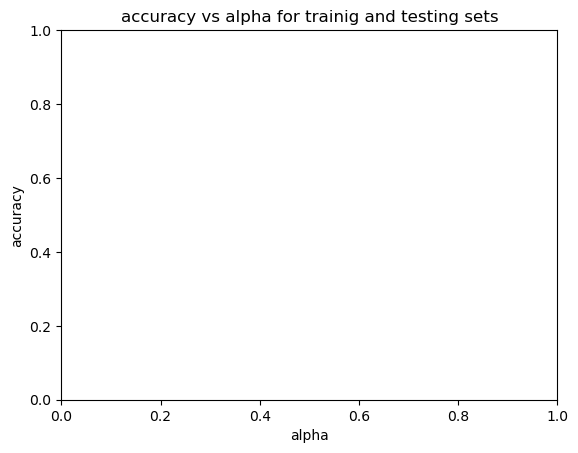

In [54]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs ]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for trainig and testing sets")
ax.plot(ccp_alphas, test_scores, marker='o', label ='test', drawstyle ='steps-post')
ax.plot(ccp_alphas, train_scores, marker='o', label ='train', drawstyle ='steps-post')

ax.legend()
plt.show()

In [57]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha= 0.06)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.06, random_state=0)

In [58]:
pred= clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7230392156862745

## AFTER USING CCP_ALPHA ON MODEL THE ACCURACY ON TEST DATA IS 72%

## ============================================================

# Feature Engineering : FEATURE IMPORTANCE

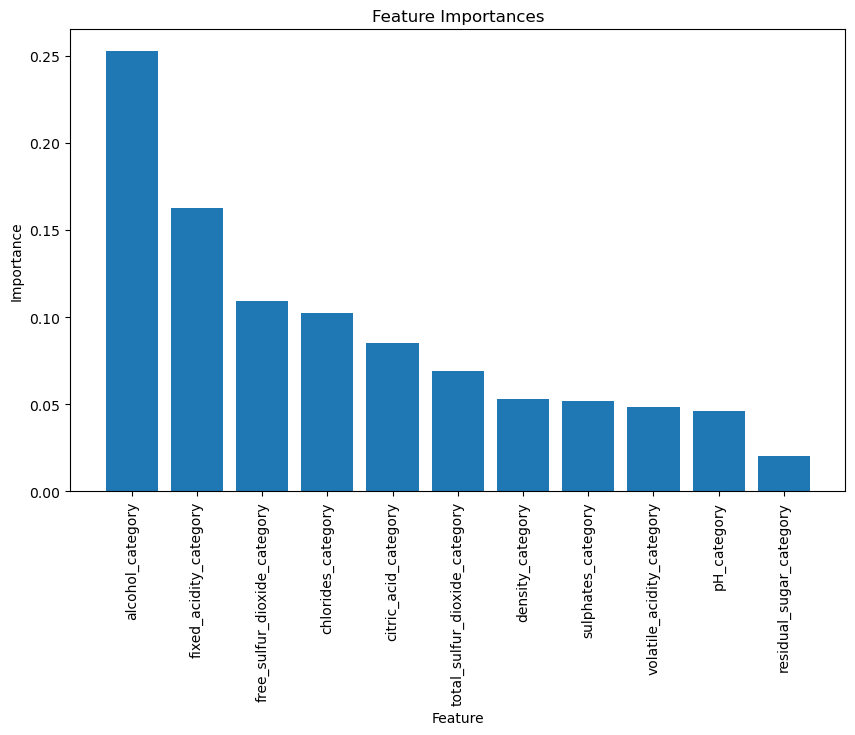

In [59]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming you have already trained your Decision Tree model (replace clf with your model)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Get feature names from your dataset
feature_names = X_train.columns  # Replace with your actual feature names

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


## ALCOHOL CATEGORY HAS HIGHEST IMPORTANCE

## -------------------------------------------------------------------------------------------

### TRIED TO CHECK HERE IS THEIR A PROMBLEM OF MULTI-COLINEARITY PROBLEM OR NOT

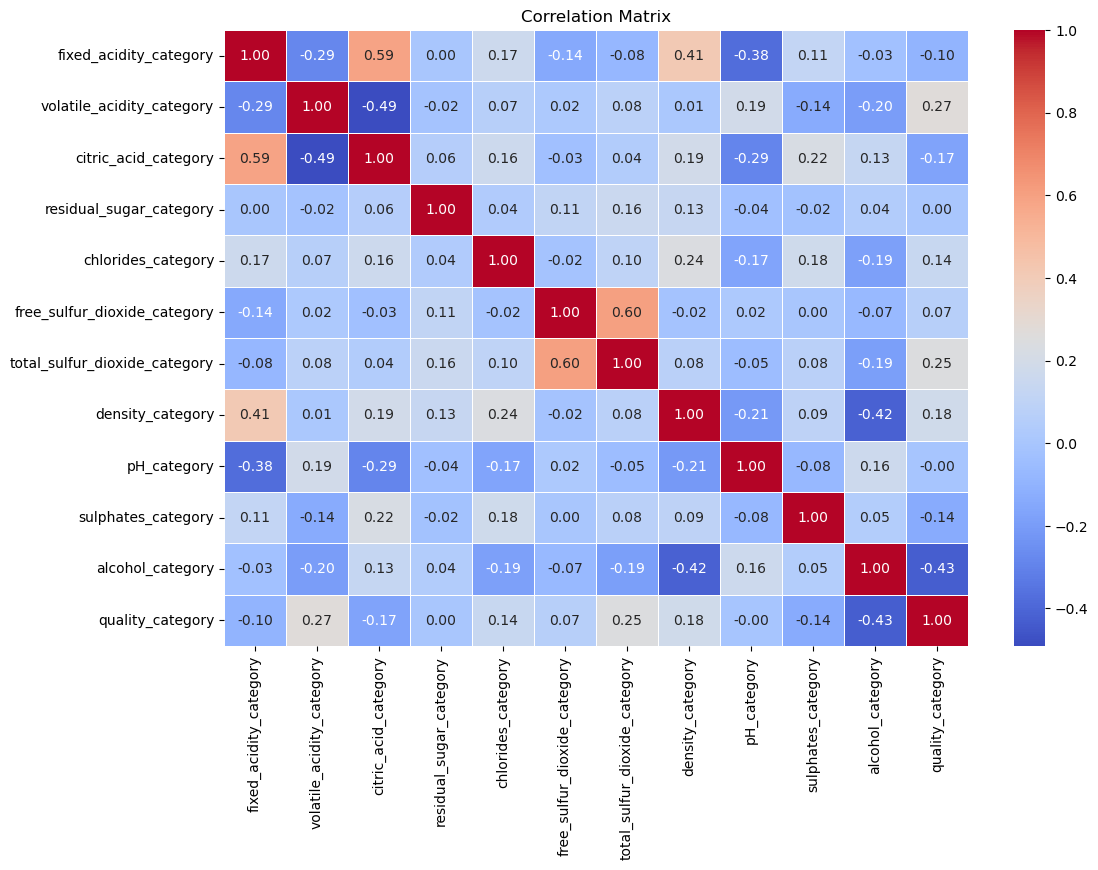

In [60]:
corr_matrix = new_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
tree_model.score(X_train,y_train) 

0.8937960042060988

In [62]:
tree_model.score(X_test,y_test)

0.6764705882352942

## HERE WE FIND THE PROBLEM OF OVERFITTING STILL EXIST

In [63]:
from sklearn import tree

In [64]:
list(X_train.columns)

['fixed_acidity_category',
 'volatile_acidity_category',
 'citric_acid_category',
 'residual_sugar_category',
 'chlorides_category',
 'free_sulfur_dioxide_category',
 'total_sulfur_dioxide_category',
 'density_category',
 'pH_category',
 'sulphates_category',
 'alcohol_category']

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
ytrain_pred=tree_model.predict(X_train)
ytest_pred=tree_model.predict(X_test)


<Axes: >

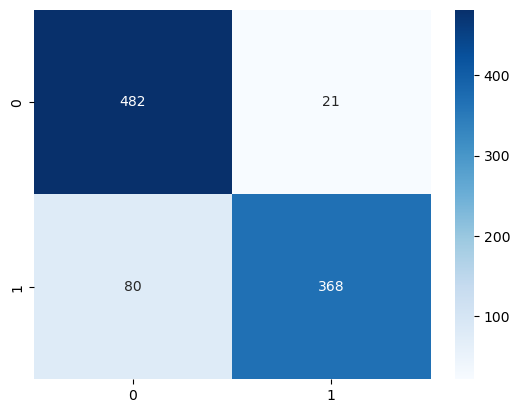

In [67]:
sns.heatmap(confusion_matrix(y_train,ytrain_pred),annot=True,fmt='g',cmap='Blues')

<Axes: >

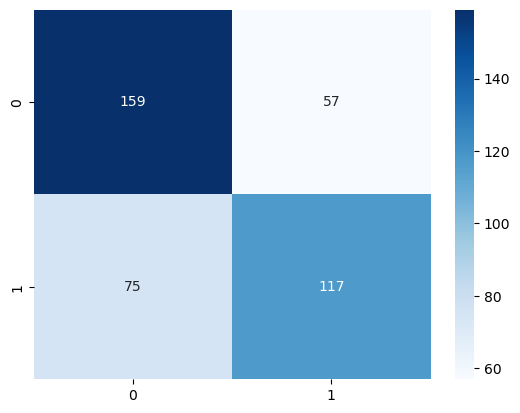

In [68]:
sns.heatmap(confusion_matrix(y_test,ytest_pred),annot=True,fmt='g',cmap='Blues')

### CONFUSION MATRIX IS JUST A VISUAL PRESENTATION OF CLASSIFICATION REPORT ON PRECISION, RECALL

## FEATURE IMPORTANCE

In [69]:
tree_model.feature_importances_

array([0.16295474, 0.04727917, 0.0803965 , 0.0211338 , 0.10939801,
       0.11056753, 0.0661318 , 0.05088181, 0.04374995, 0.05511132,
       0.25239537])

In [110]:

feature_importance = pd.DataFrame(tree_model.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importance

,Importance
fixed_acidity_category,0.162955
volatile_acidity_category,0.047279
citric_acid_category,0.080396
residual_sugar_category,0.021134
chlorides_category,0.109398
free_sulfur_dioxide_category,0.110568
total_sulfur_dioxide_category,0.066132
density_category,0.050882
pH_category,0.043750
sulphates_category,0.055111


# A MODEL USING GRID SEARCH 

In [71]:
model=DecisionTreeClassifier()


In [72]:
grid={'max_depth':[4,6],
      'min_samples_split':[50,100,150],
      'min_samples_leaf':[20,50],
      'criterion':['gini','entropy']}

In [73]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5,scoring='recall')

In [74]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_leaf': [20, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='recall')

In [75]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [76]:
best_model=grid_search.best_estimator_

In [77]:
best_model.score(X_train,y_train)

0.7160883280757098

In [78]:
best_model.score(X_test,y_test)

0.7083333333333334

In [79]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       503
           1       0.95      0.82      0.88       448

    accuracy                           0.89       951
   macro avg       0.90      0.89      0.89       951
weighted avg       0.90      0.89      0.89       951



In [80]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       216
           1       0.67      0.61      0.64       192

    accuracy                           0.68       408
   macro avg       0.68      0.67      0.67       408
weighted avg       0.68      0.68      0.67       408



## USING GRID-SEARCH ACCURACY ON TRAIN : 89% AND TEST: 68%
## STILL THE OVERFITING PROBLEM EXIST

In [81]:
#!pip install imbalanced-learn

In [82]:
#!pip install imblearn

In [83]:
#pip install --upgrade scikit-learn

In [84]:
#pip install scikit-learn

In [85]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn


In [86]:
#!pip install scikit-learn==0.24.2


In [87]:
from imblearn.over_sampling import RandomOverSampler

In [88]:
#!pip install --upgrade scikit-learn imbalanced-learn


# A MODEL USING SMOTE AND GRID-SEARCH

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
sm=SMOTE()

In [91]:
X_Train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [92]:
X_train.shape

(951, 11)

In [93]:
X_Train_res.shape

(1006, 11)

In [94]:
y_train_res.value_counts()

0    503
1    503
Name: quality_category, dtype: int64

In [95]:
sm_model = DecisionTreeClassifier(max_depth=8, min_samples_split=200, min_samples_leaf=100)

In [96]:
sm_model.fit(X_Train_res,y_train_res)             

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, min_samples_split=200)

In [97]:
ytrain_pred=sm_model.predict(X_train)
ytest_pred=sm_model.predict(X_test)

In [98]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       503
           1       0.68      0.69      0.69       448

    accuracy                           0.70       951
   macro avg       0.70      0.70      0.70       951
weighted avg       0.70      0.70      0.70       951



In [99]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       216
           1       0.71      0.69      0.70       192

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408



## HERE THE OVERFITTING PROBLEM AND IMBALACE PROBLEM IS SOLVE 
## ACCURACY ON TRAIN: 70% AND TEST: 72%

## A TREE USING SMOTE AND GRIDSEARCH-CV

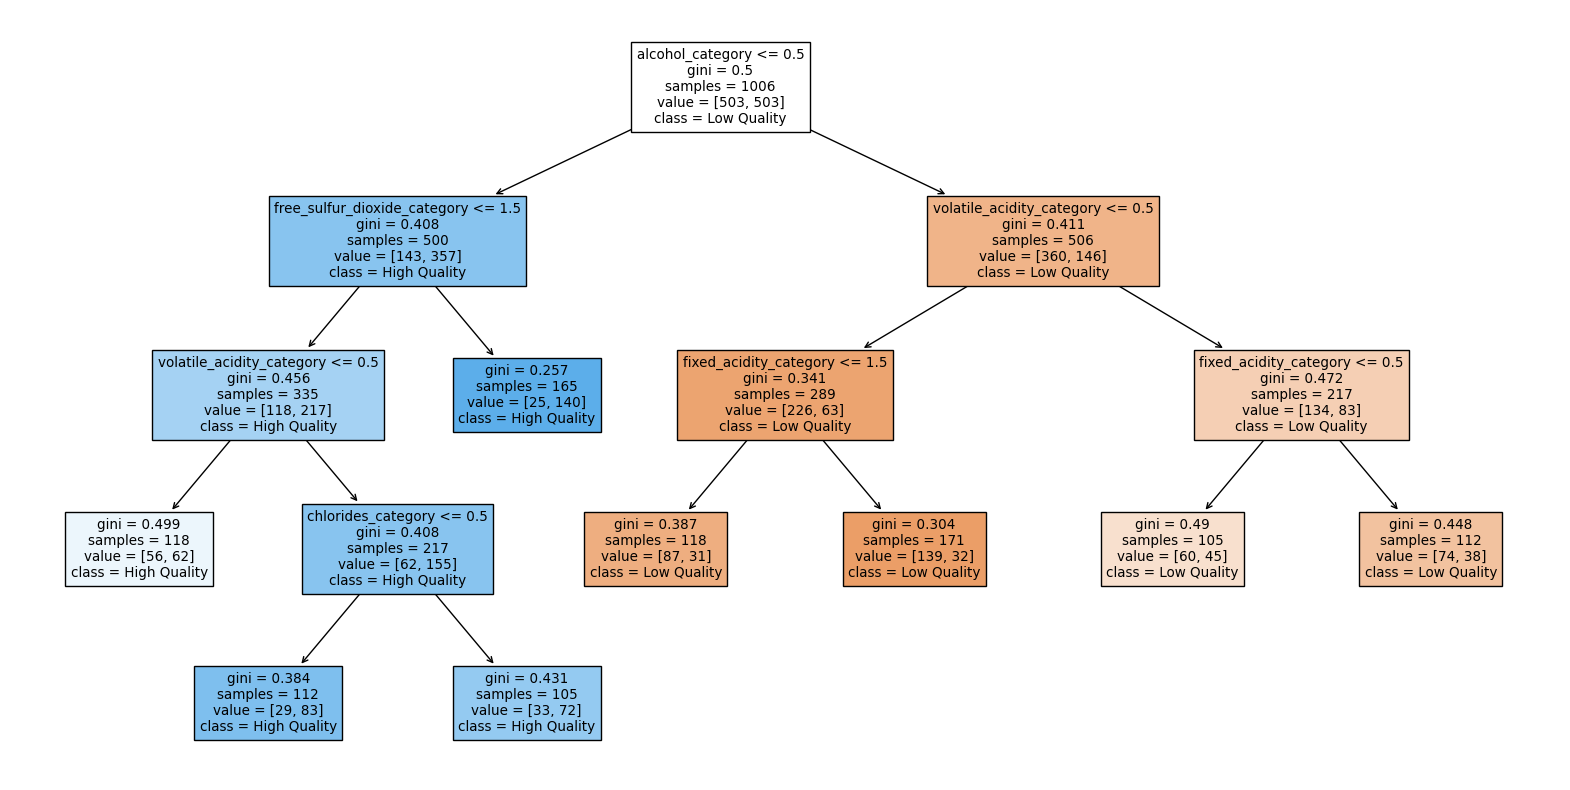

In [100]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
class_names_str = ["Low Quality", "High Quality"]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(sm_model, filled=True, feature_names=X_train.columns, class_names=class_names_str)
plt.show()


## BUILT A MODEL BY TRYING DIFRENT HYPER-PARAMETERS

In [101]:
bal_model=DecisionTreeClassifier(max_depth=4,min_samples_split=700,min_samples_leaf=400)

In [102]:
bal_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=400, min_samples_split=700)

In [103]:
ytrain_pred=bal_model.predict(X_train)
ytest_pred=bal_model.predict(X_test)

In [104]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       503
           1       0.68      0.69      0.69       448

    accuracy                           0.70       951
   macro avg       0.70      0.70      0.70       951
weighted avg       0.70      0.70      0.70       951



In [105]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       216
           1       0.71      0.69      0.70       192

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408



## ACCURACY ON TRAIN: 70% AND ON TEST: 72%

# ---------------------------------------------------------------------------------------------

# MODEL USING ADYSN AND GRID_SEARCH 

In [106]:
from imblearn.over_sampling import RandomOverSampler

In [107]:
from imblearn.over_sampling import ADASYN

In [108]:
ad= ADASYN()

In [109]:
X_Train_res,y_train_res=ad.fit_resample(X_train,y_train)

ValueError: No samples will be generated with the provided ratio settings.

In [ ]:
X_train.shape

In [ ]:
X_Train_res.shape

In [ ]:
y_train_res.value_counts()

In [117]:
ad_model=DecisionTreeClassifier(max_depth=4,min_samples_split=700,min_samples_leaf=400)

In [118]:
ad_model = DecisionTreeClassifier(max_depth =10, min_samples_leaf =10, min_samples_split= 200)

In [119]:
ad_model.fit(X_Train_res,y_train_res)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=200)

In [120]:
ytrain_pred=ad_model.predict(X_train)
ytest_pred=ad_model.predict(X_test)

In [121]:
print(classification_report(y_train,ytrain_pred))


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       503
           1       0.70      0.73      0.71       448

    accuracy                           0.72       951
   macro avg       0.72      0.72      0.72       951
weighted avg       0.72      0.72      0.72       951



In [122]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       216
           1       0.70      0.72      0.71       192

    accuracy                           0.73       408
   macro avg       0.72      0.73      0.72       408
weighted avg       0.73      0.73      0.73       408



# ACCURACY ON TRAIN : 73% AND TEST: 73%


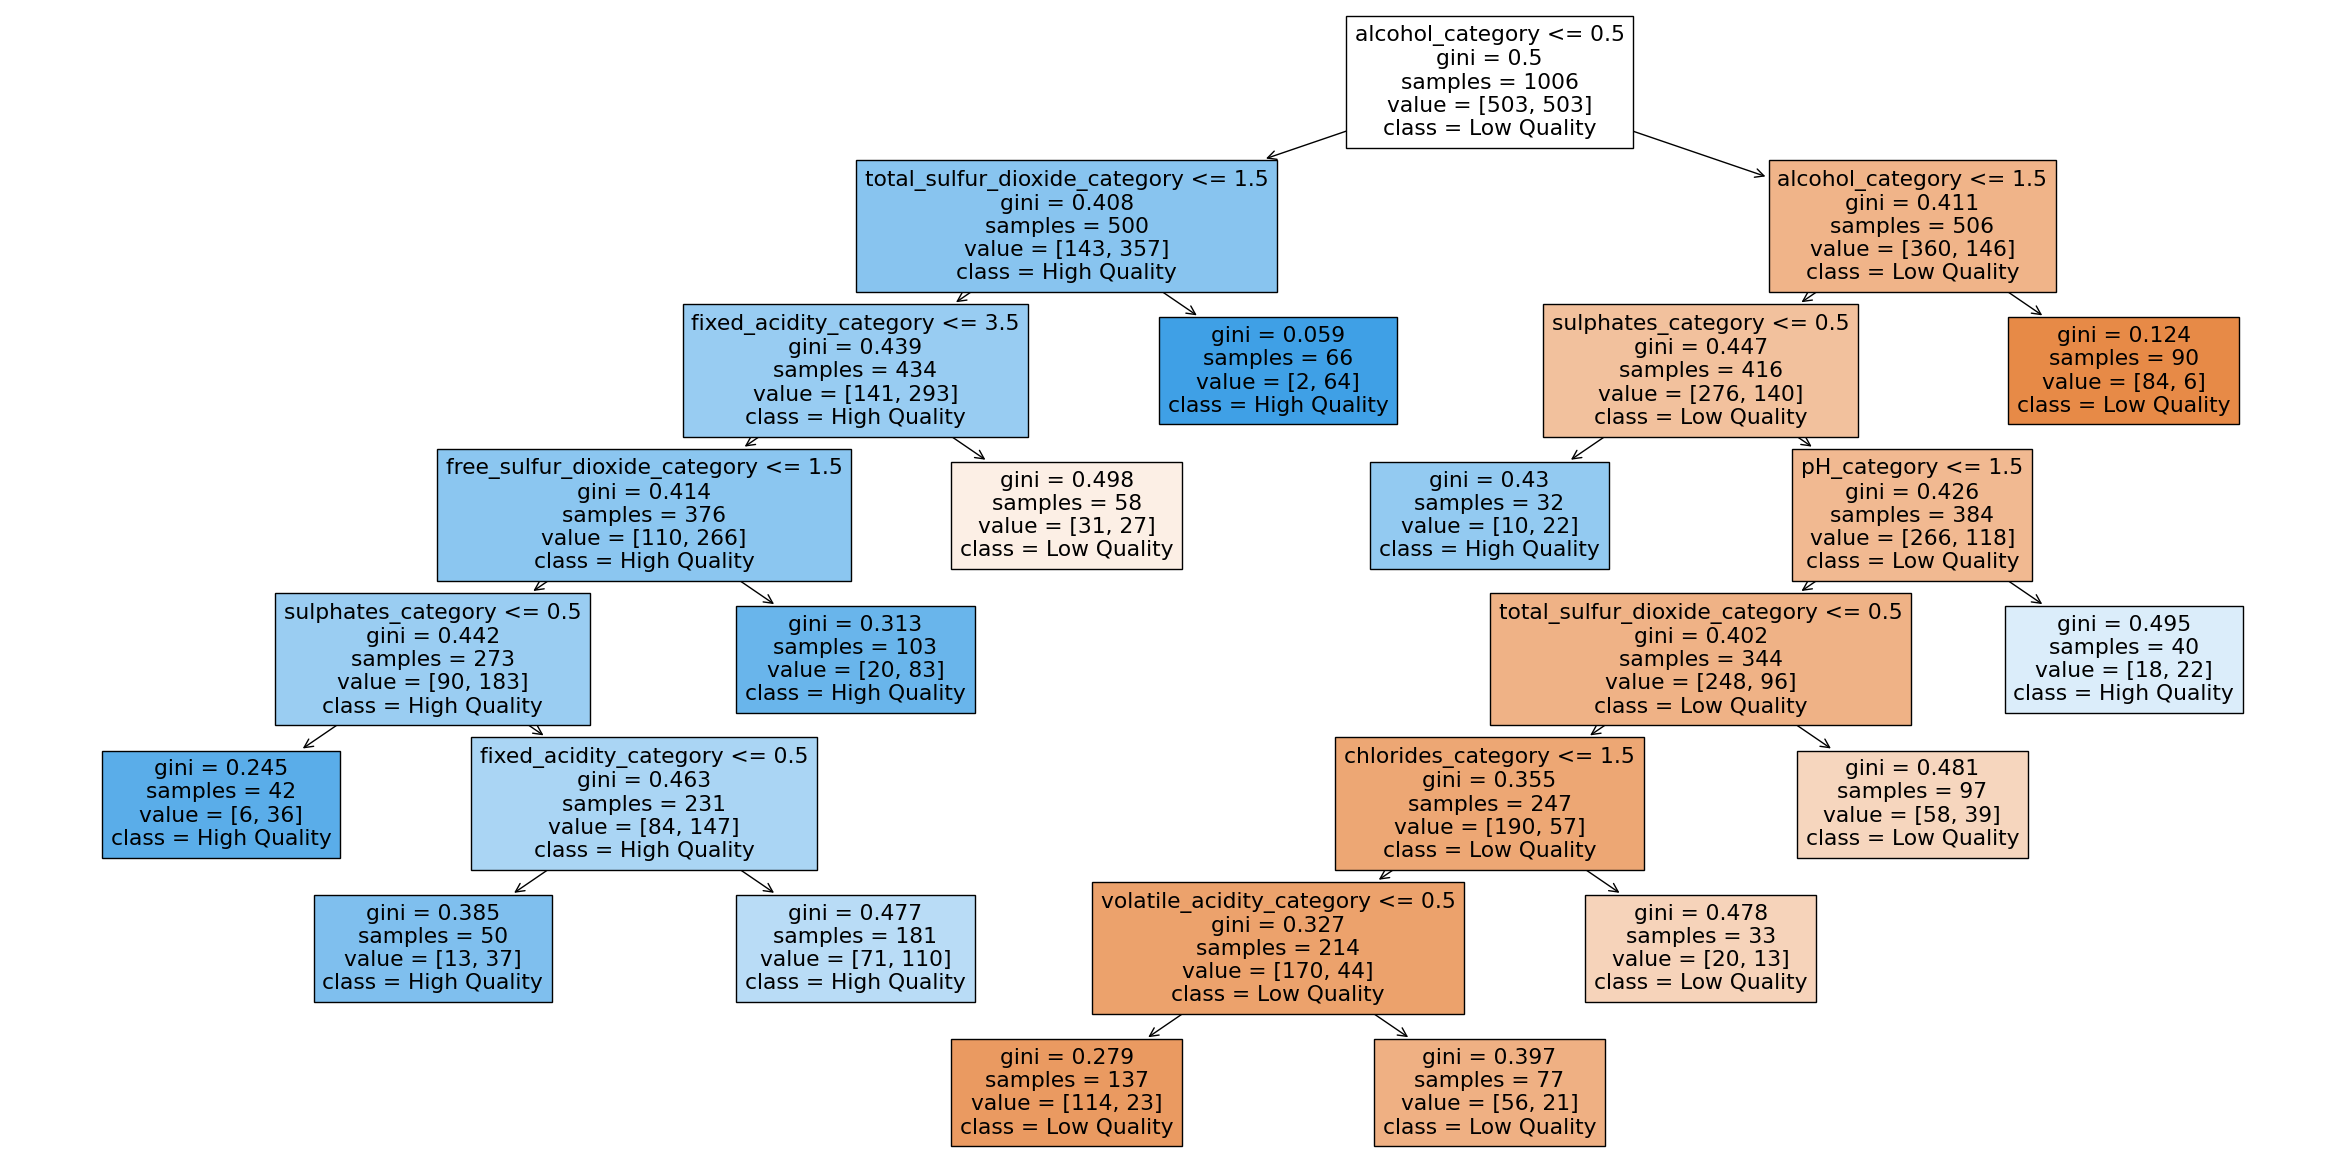

In [123]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class names to strings
class_names_str = ["Low Quality", "High Quality"]
# Plot the decision tree
plt.figure(figsize=(30, 15))
plot_tree(ad_model, filled=True, feature_names=X_train.columns, class_names=class_names_str)
plt.show()


In [124]:
## to visualize a tree(dot file)
class_names_str = ["Low Quality", "High Quality"]
wine_tree_file=open('wine_tree_file.dot','w')## w is writable
dot_file=tree.export_graphviz(ad_model,
                              out_file=wine_tree_file,
                              feature_names=list(X_train.columns),
                              class_names=class_names_str)
wine_tree_file.close()

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 12, 15, None],
    'min_samples_split': [200, 300, 500, 1000],
    'min_samples_leaf': [10, 20, 30, 50]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_Train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)
ad_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 200}


In [126]:

feature_importance = pd.DataFrame(ad_model.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importance

,Importance
fixed_acidity_category,0.049598
volatile_acidity_category,0.007411
citric_acid_category,0.000000
residual_sugar_category,0.000000
chlorides_category,0.013870
free_sulfur_dioxide_category,0.018778
total_sulfur_dioxide_category,0.095942
density_category,0.000000
pH_category,0.035974
sulphates_category,0.082093


<Figure size 1000x600 with 0 Axes>

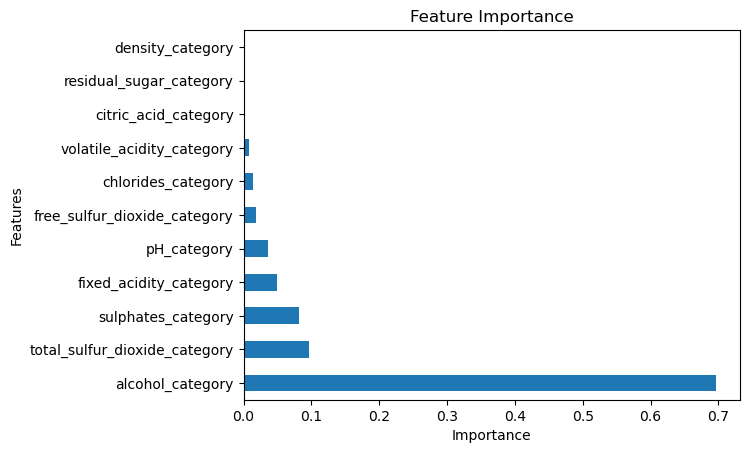

In [127]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# MODEL USING ADYSN, GRID-SEARCH AND FEATURE-IMPORTANCE 

### Drop features with low importance from both training and test sets

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       503
           1       0.70      0.73      0.71       448

    accuracy                           0.72       951
   macro avg       0.72      0.72      0.72       951
weighted avg       0.72      0.72      0.72       951

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       216
           1       0.70      0.72      0.71       192

    accuracy                           0.73       408
   macro avg       0.72      0.73      0.72       408
weighted avg       0.73      0.73      0.73       408



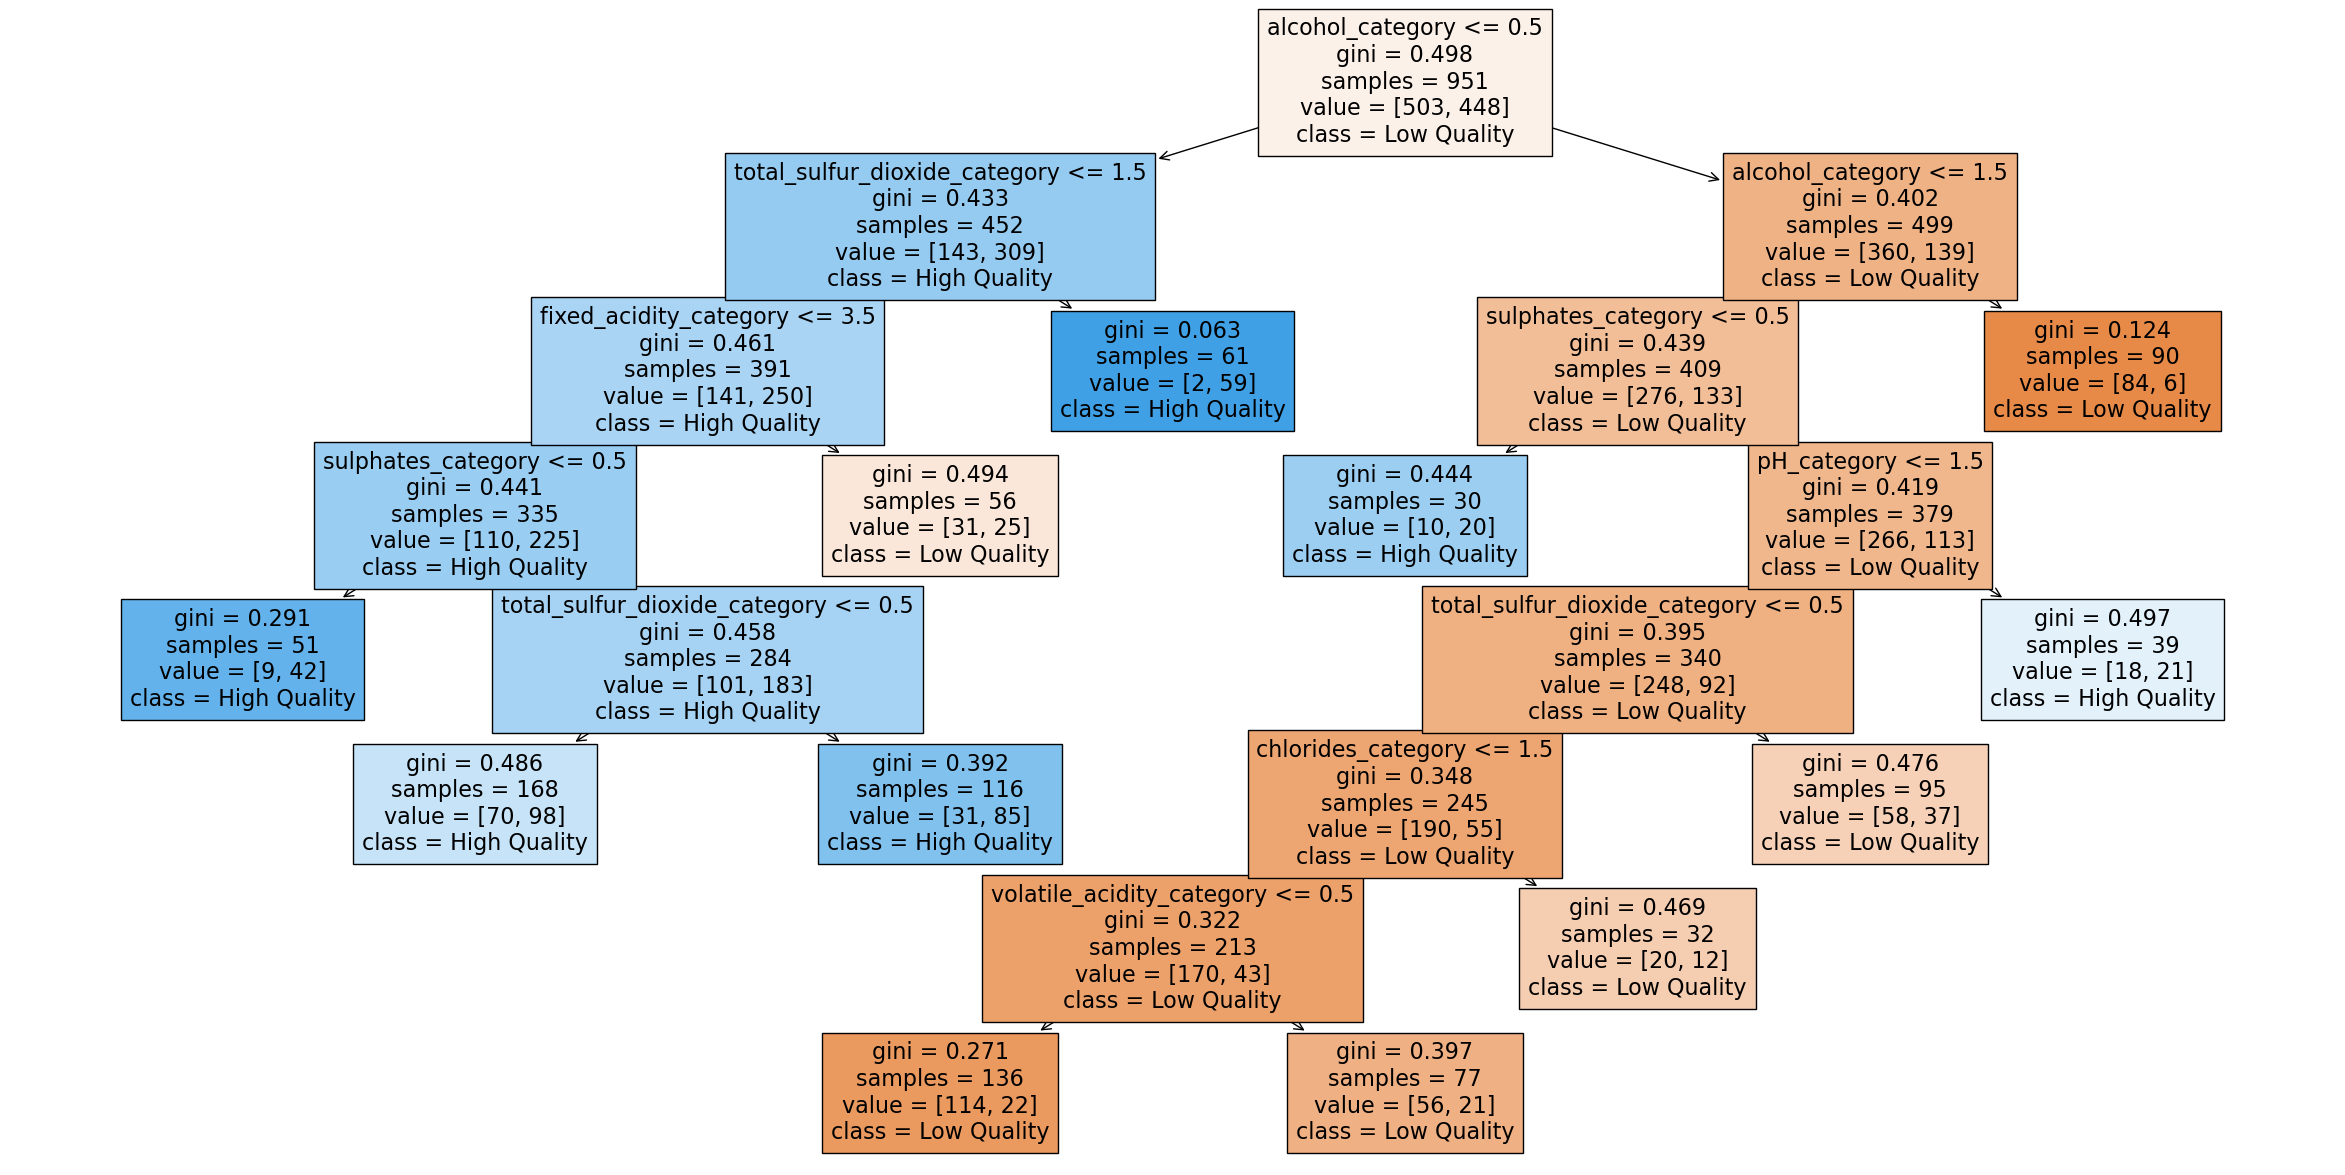

In [115]:
# Drop features with low importance from both training and test sets
low_importance_features = ['citric_acid_category', 'residual_sugar_category', 'free_sulfur_dioxide_category', 'density_category']

X_train_selected = X_train.drop(low_importance_features, axis=1)
X_test_selected = X_test.drop(low_importance_features, axis=1)

# Retrain the decision tree model with the updated dataset
ad_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=200)
ad_model.fit(X_train_selected, y_train)  # Corrected variable name

# Make predictions on the training set
ytrain_pred = ad_model.predict(X_train_selected)

# Make predictions on the test set
ytest_pred = ad_model.predict(X_test_selected)

# Print classification reports
print("Training Set Classification Report:")
print(classification_report(y_train, ytrain_pred))

print("Test Set Classification Report:")
print(classification_report(y_test, ytest_pred))

# Plot the decision tree
plt.figure(figsize=(30, 15))
plot_tree(ad_model, filled=True, feature_names=X_train_selected.columns, class_names=class_names_str)
plt.show()


# HERE WE FINALIZE THIS MODEL AS IT IS A MUCH BALANCED MODEL 
# WHERE, ACCURACY ON TRAIN: 72%, AND ON TEST : 73%

# -------------------------------------------------------------------------------------

# HERE WE TRIED USING ADYSN MODEL WITH CCP_ALPHA 

In [ ]:
path = ad_model.cost_complexity_pruning_path(X_train_selected, y_train) # simple tree
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs=[] #simple tree
for ccp_alpha in ccp_alphas:
    ad_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    ad_model.fit(X_train_selected,y_train)
    clfs.append(ad_model)
print("Number of nodes in last tree is: {} with ccp_alpha: {}".format( clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
train_scores = [ad_model.score(X_train_selected, y_train) for ad_model in clfs]
test_scores = [ad_model.score(X_test_selected, y_test) for ad_model in clfs ]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for trainig and testing sets")
ax.plot(ccp_alphas, test_scores, marker='o', label ='test', drawstyle ='steps-post')
ax.plot(ccp_alphas, train_scores, marker='o', label ='train', drawstyle ='steps-post')

ax.legend()
plt.show()

In [ ]:
ad_model = DecisionTreeClassifier(random_state=0, ccp_alpha= 0.001)
ad_model.fit(X_train_selected,y_train)

In [ ]:
pred= ad_model.predict(X_test_selected)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

## ACCURACY ON TEST: 73%
## ------------------------------------------------------------------------------------------------------

### The model is providing consistent performance on both the training and test sets, indicating that it generalizes well to unseen data.
### The precision, recall, F1-score, and accuracy metrics collectively suggest a balanced performance on both classes.
### Further hyperparameter tuning or exploring other algorithms may be considered to see if there is room for improvement, but the current model is providing reasonable results.

In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Wine Quality Prediction</title>
</head>
<body>
    <h1>Wine Quality Prediction</h1>
    <form action="/predict" method="post">
        <!-- Include input fields for each feature -->
        <label for="fixed_acidity">Fixed Acidity:</label>
        <input type="text" name="fixed_acidity" required>
        <br>

        <label for="volatile_acidity">Volatile Acidity:</label>
        <input type="text" name="volatile_acidity" required>
        <br>
        
        <!-- Citric Acid -->
        <label for="citric_acid">Citric Acid:</label>
        <input type="text" name="citric_acid" required>
        <br>
        
        <label for="residual_sugar">Residual Sugar:</label>
        <input type="text" name="residual_sugar" required>
        <br>
        
        <label for="chlorides">Chlorides:</label>
        <input type="text" name="chlorides" required>
        <br>
        
        <label for="free_sulfur_dioxide">Free Sulfur Dioxide:</label>
        <input type="text" name="free_sulfur_dioxide" required>
        <br>

        <!-- Total Sulfur Dioxide -->
        <label for="total_sulfur_dioxide">Total Sulfur Dioxide:</label>
        <input type="text" name="total_sulfur_dioxide" required>
        <br>

        <!-- Density -->
        <label for="density">Density:</label>
        <input type="text" name="density" required>
        <br>
        
        <label for="pH">pH:</label>
        <input type="text" name="pH" required>
        <br>

        <!-- Sulphates -->
        <label for="sulphates">Sulphates:</label>
        <input type="text" name="sulphates" required>
        <br>

        <!-- Alcohol -->
        <label for="alcohol">Alcohol:</label>
        <input type="text" name="alcohol" required>
        <br>


        <input type="submit" value="Predict">
    </form>

    <!-- Display predictions -->
    {% if prediction %}
        <p>Predicted Wine Quality: {{ prediction }}</p>
    {% endif %}
</body>
</html>


In [ ]:
df.head(1)

In [ ]:
import joblib

In [ ]:
joblib.dump(ad_model, r'C:\Users\Sakshi\OneDrive\Desktop\wine\FINAL_Wine_Quality_Model.joblib')

In [ ]:
from joblib import dump
dump(ad_model, 'Final_Wine_Quality.joblib')

# app.py
from flask import Flask, render_template, request
from joblib import load
import pandas as pd

app = Flask(__name__)
model = load('Final_Wine_Quality.joblib')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Prepare user inputs as a DataFrame
    user_inputs = {
        'fixed_acidity': [float(request.form['fixed_acidity'])],
        'volatile_acidity': [float(request.form['volatile_acidity'])],
        # Repeat for other features
    }
    user_data = pd.DataFrame(user_inputs)

    # Make prediction
    prediction = model.predict(user_data)[0]

    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(use_reloader=False, debug=False)


In [ ]:
new_df.columns

# app.py
from flask import Flask, render_template, request
from joblib import load
import pandas as pd

app = Flask(__name__)
model = load('Final_Wine_Quality.joblib')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Prepare user inputs as a DataFrame
    user_inputs = {
        'fixed_acidity': [float(request.form['fixed_acidity'])],
        'volatile_acidity': [float(request.form['volatile_acidity'])],
        'citric_acid': [float(request.form['citric_acid'])],
        'residual_sugar': [float(request.form['residual_sugar'])],
        'chlorides': [float(request.form['chlorides'])],
        'free_sulfur_dioxide': [float(request.form['free_sulfur_dioxide'])],
        'total_sulfur_dioxide': [float(request.form['total_sulfur_dioxide'])],
        'density': [float(request.form['density'])],
        'pH': [float(request.form['pH'])],
        'sulphates': [float(request.form['sulphates'])],
        'alcohol': [float(request.form['alcohol'])],
        'quality': [float(request.form['quality'])],
    }
    user_data = pd.DataFrame(user_inputs)

    # Make prediction
    prediction = sd_model.predict(user_data)[0]

    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(use_reloader=False, debug=True)


from flask import Flask, render_template, request
import joblib
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG) 
app = Flask(__name__)

# Load the trained model
model = joblib.load(open(r'C:\Users\Sakshi\OneDrive\Desktop\wine\FINAL_Wine_Quality_Model.joblib','rb'))

def map_prediction_label(prediction):
    if prediction == 0:
        return "Low Quality"
    elif prediction == 1:
        return "High Quality"
    else:
        return "Unknown"

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST','GET'])
def predict():
    # Get values from the form
    fixed_acidity_category = float(request.form['fixed_acidity_category'])
    volatile_acidity_category = float(request.form['volatile_acidity_category'])
    chlorides_category = float(request.form['chlorides_category'])
    total_sulfur_dioxide_category = float(request.form['total_sulfur_dioxide_category'])
    pH_category = float(request.form['pH_category'])
    sulphates_category = float(request.form['sulphates_category'])
    alcohol_category = float(request.form['alcohol_category'])
    # Create input data as a numpy array
    input_data = np.array([
        [fixed_acidity_category, volatile_acidity_category, chlorides_category, 
        total_sulfur_dioxide_category,pH_category, 
        sulphates_category, alcohol_category]
    ])

    # Make prediction
    prediction = model.predict(input_data)[0]
    print("Prediction",prediction)
    prediction_label = map_prediction_label(prediction)

    return render_template('index.html', prediction=prediction_label)

if __name__ == '__main__':
    app.run(debug=True)
